In [1]:
import numpy as np
from matplotlib import pyplot as plt

Power Spectrum

In [2]:
basedir = '/global/cfs/cdirs/desi/cosmosim/KP45/MC/Clustering/AbacusSummit/CutSky/LRG/Pk/Post/nadathur/fiducial_settings/dk0.005/'

In [3]:
zmns = [46, 68, 81]
zbins = [ (0.4, 0.6), (0.6, 0.8), (0.8, 1.1) ]
fzs = [0.839, 0.841, 0.830]

0.839
0.841
0.83


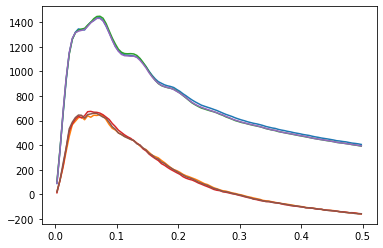

In [5]:
# Import the data
user = 'nadathur'
dk = 0.005

for ii in range(3):

    znm = zmns[ii]
    zmin, zmax = zbins[ii]
    fz = fzs[ii]
    print(fz)
    
    dat = 0

    for ii in range(25):
        
        sim_ii = np.loadtxt(basedir + \
            'cutsky_LRG_%.1fz%.1f_ph0%02d.shift_MultiGrid_randoms20X_reso7.8_smooth10_pad1.5_recsym_f%.3f_b2.00.fits.Pk_nmesh1024.txt'%(zmin, zmax, ii, fz))
        
        np.savetxt('pkells_recsym_s%02d_z%2d.dat'%(ii, znm), np.array([sim_ii[:100,1], sim_ii[:100,3], sim_ii[:100,4]]).T)
        
        dat += 1./25 * np.loadtxt(basedir + \
                                  'cutsky_LRG_%.1fz%.1f_ph0%02d.shift_MultiGrid_randoms20X_reso7.8_smooth10_pad1.5_recsym_f%.3f_b2.00.fits.Pk_nmesh1024.txt'%(zmin, zmax, ii, fz))
    
    plt.plot(dat[:100,1], dat[:100,1]*dat[:100,3])
    plt.plot(dat[:100,1], dat[:100,1]*dat[:100,4])
    
    np.savetxt('pkells_recsym_mean_z%2d.dat'%(znm), np.array([dat[:100,1], dat[:100,3], dat[:100,4]]).T)

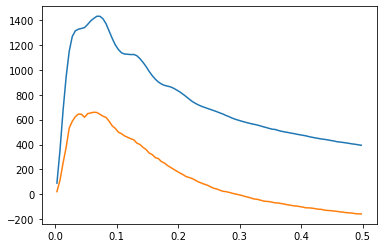

In [11]:
plt.plot(dat[:100,1], dat[:100,1]*dat[:100,3])
plt.plot(dat[:100,1], dat[:100,1]*dat[:100,4])

In [32]:
basedir = '/global/cfs/cdirs/desi/cosmosim/KP45/MC/Clustering/EZmock/CubicBox/LRG/Pk/jmena/nmesh_512/dk0.005/'
cov = np.loadtxt(basedir + 'cov.txt')

In [34]:
Ndat = 100
np.savetxt('pkells_recsym_cov_cubic.dat',  cov[:(2*Ndat),:(2*Ndat)]) 

Correlation function

In [4]:
filebase = '/global/cfs/cdirs/desi/cosmosim/KP45/MC/Clustering/AbacusSummit/CutSky/LRG/Xi/Post/jmena/'

In [16]:
for ii in range(3):

    zmin, zmax = zbins[ii]
    znm = zmns[ii]
    
    ss = np.loadtxt(filebase + '/s.txt')
    nbins = len(ss)
    
    x0s = np.loadtxt(filebase + '/Xi_0_zmin%.1f_zmax%.1f.txt'%(zmin,zmax)); x0 = np.mean(x0s,axis=1)
    x2s = np.loadtxt(filebase + '/Xi_2_zmin%.1f_zmax%.1f.txt'%(zmin,zmax)); x2 = np.mean(x2s,axis=1)
    x4s = np.loadtxt(filebase + '/Xi_4_zmin%.1f_zmax%.1f.txt'%(zmin,zmax))
    
    for ii in range(25):
        np.savetxt('xiells_recsym_s%02d_z%2d.dat'%(ii,znm),\
                 np.array([ss, x0s[:,ii], x2s[:,ii]]).T )
    
    np.savetxt('xiells_recsym_mean_z%2d.dat'%(znm), np.array([ss,x0,x2]).T) 

In [10]:
np.array([ss, x0s[:,0], x2s[:,0]]).shape

(3, 50)

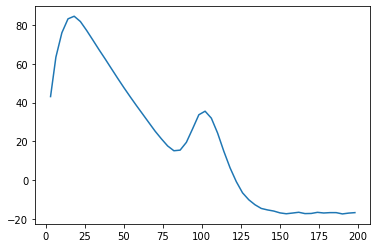

In [14]:
plt.plot(ss, ss**2 * x0)

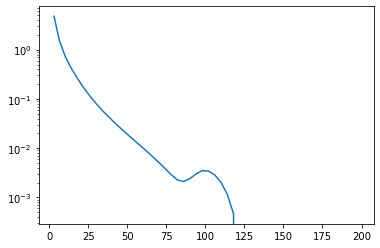

In [18]:
plt.semilogy(ss, x0)

In [19]:
filebase= '/global/cfs/cdirs/desi/cosmosim/KP45/MC/Clustering/EZmock/CutSky/LRG/Xi/jmena/'

In [20]:
for ii in range(3):

    zmin, zmax = zbins[ii]
    znm = zmns[ii]
    
    cov = np.loadtxt(filebase + '/cov_zmin%.1f_zmax%.1f.txt'%(zmin,zmax))[:(2*nbins),:(2*nbins)]
    
    np.savetxt('xiells_recsym_cov_z%2d.dat'%(znm), cov) 

OSError: /global/cfs/cdirs/desi/cosmosim/KP45/MC/Clustering/EZmock/CutSky/LRG/Xi/jmena//cov_zmin0.8_zmax1.1.txt not found.

In [11]:
cov.shape

(150, 150)

In [21]:
ls /global/cfs/cdirs/desi/cosmosim/KP45/MC/Clustering/EZmock/CutSky/LRG/Xi/jmena

Xi_0_zmin0.4_zmax0.6.txt  Xi_4_zmin0.4_zmax0.6.txt  pycorr_format/
Xi_0_zmin0.6_zmax0.8.txt  Xi_4_zmin0.6_zmax0.8.txt  s.txt
Xi_2_zmin0.4_zmax0.6.txt  cov_zmin0.4_zmax0.6.txt
Xi_2_zmin0.6_zmax0.8.txt  cov_zmin0.6_zmax0.8.txt
